In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "Bergmann"
cell_type2 = "Purkinje"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,29.918272,6.849262,0.165494,41.386809,0.000000e+00,0.000000e+00
1,Gria4,53.854927,7.787848,0.212283,36.686184,1.212934e-294,8.147885e-291
2,Ank2,60.033117,3.913847,0.117166,33.404393,1.183720e-244,5.301094e-241
3,Dtna,10.404828,5.752538,0.185098,31.078327,4.728054e-212,1.588035e-208
4,Slc1a3,11.230687,8.892276,0.294475,30.197038,2.590471e-200,6.960597e-197
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


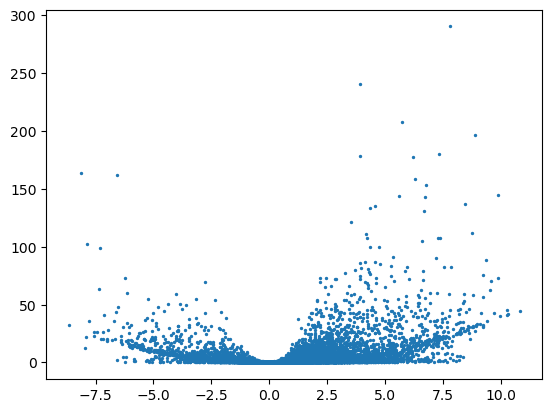

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

In [5]:
df = df[df["padj"].notna()]

In [6]:
p = df["padj"].values

tp = np.nanpercentile(p, 20)

# use log fold change 2 / -2 as cuttoff

In [7]:
df[(df["padj"] < tp) & (df["log2FoldChange"] > 4)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,29.918272,6.849262,0.165494,41.386809,0.000000e+00,0.000000e+00
1,Gria4,53.854927,7.787848,0.212283,36.686184,1.212934e-294,8.147885e-291
3,Dtna,10.404828,5.752538,0.185098,31.078327,4.728054e-212,1.588035e-208
4,Slc1a3,11.230687,8.892276,0.294475,30.197038,2.590471e-200,6.960597e-197
5,Qk,27.907577,7.346932,0.253984,28.926797,5.496565e-184,1.230773e-180
...,...,...,...,...,...,...,...
2619,Fscn1,0.651840,5.152899,1.218308,4.229554,2.341548e-05,1.200713e-04
2623,Lhfpl2,2.620784,4.141101,0.980535,4.223309,2.407413e-05,1.232606e-04
2628,Hnmt,0.858775,4.357874,1.033167,4.217975,2.465064e-05,1.259723e-04
2635,Cpt1a,0.542036,4.314067,1.025908,4.205121,2.609428e-05,1.329957e-04


In [8]:
df[(df["padj"] < tp) & (df["log2FoldChange"] < -4)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
8,Anks1b,62.002306,-8.110679,0.294123,-27.575770,2.173056e-167,3.243890e-164
9,Itpr1,16.483647,-6.592925,0.240002,-27.470286,3.977341e-166,5.343558e-163
26,Snhg11,86.320865,-7.880721,0.361415,-21.805204,2.070802e-105,1.030416e-102
29,Meg3,95.587493,-7.312490,0.340298,-21.488517,1.993794e-102,8.928875e-100
53,Cdh18,17.965835,-6.207178,0.335986,-18.474527,3.311155e-76,8.238031e-74
...,...,...,...,...,...,...,...
2238,Fam117a,0.448339,-4.941921,1.032724,-4.785327,1.707094e-06,1.024333e-05
2268,Ankrd33b,0.313094,-4.891210,1.036154,-4.720545,2.352140e-06,1.392728e-05
2452,Ryr1,0.492162,-6.298627,1.413057,-4.457448,8.294109e-06,4.540940e-05
2466,Corin,0.361352,-6.172192,1.391832,-4.434580,9.225197e-06,5.023937e-05


# 20% percentile adjusted p with foldchange threshold at 4

In [9]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < tp) & (df["log2FoldChange"] > 4)] = cell_type1
category[(df["padj"] < tp) & (df["log2FoldChange"] < -4)] = cell_type2

In [10]:
df["category"] = category

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54725/2755691291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = category


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


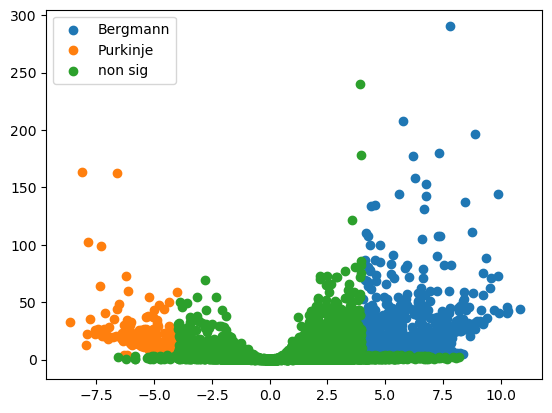

In [11]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [12]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Luzp2,29.918272,6.849262,0.165494,41.386809,0.000000e+00,0.000000e+00,Bergmann
1,Gria4,53.854927,7.787848,0.212283,36.686184,1.212934e-294,8.147885e-291,Bergmann
3,Dtna,10.404828,5.752538,0.185098,31.078327,4.728054e-212,1.588035e-208,Bergmann
4,Slc1a3,11.230687,8.892276,0.294475,30.197038,2.590471e-200,6.960597e-197,Bergmann
5,Qk,27.907577,7.346932,0.253984,28.926797,5.496565e-184,1.230773e-180,Bergmann
...,...,...,...,...,...,...,...,...
2619,Fscn1,0.651840,5.152899,1.218308,4.229554,2.341548e-05,1.200713e-04,Bergmann
2623,Lhfpl2,2.620784,4.141101,0.980535,4.223309,2.407413e-05,1.232606e-04,Bergmann
2628,Hnmt,0.858775,4.357874,1.033167,4.217975,2.465064e-05,1.259723e-04,Bergmann
2635,Cpt1a,0.542036,4.314067,1.025908,4.205121,2.609428e-05,1.329957e-04,Bergmann


# Map back to genome

In [20]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")
# meta["gene"] = meta["gene"].str.replace("March", "Marchf")
# meta["gene"] = meta["gene"].str.replace("Sept", "Septin")

# Mismatch between DE gene naming and annotated namming

In [23]:
DE_sig_25kb = meta.merge(DE_genes)

In [24]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 57 gene, 0.06455266138165346 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
52,Adrbk2,2.276579,4.595013,0.248396,18.498731,2.113934e-76,5.358622e-74,Bergmann
63,Gm3764,11.572420,9.589053,0.527992,18.161352,1.044221e-73,2.192048e-71,Bergmann
94,Dfna5,6.360832,9.252038,0.570698,16.211792,4.162554e-59,5.886728e-57,Bergmann
147,Fam213a,2.237132,4.242875,0.290990,14.580832,3.719572e-48,3.376517e-46,Bergmann
188,X2610035D17Rik,4.569232,8.191929,0.585604,13.988863,1.823027e-44,1.295893e-42,Bergmann
278,X4930578G10Rik,7.256472,4.747002,0.381119,12.455421,1.306609e-35,6.291863e-34,Bergmann
323,X1700047M11Rik,3.203153,9.225570,0.766734,12.032294,2.403866e-33,9.967882e-32,Bergmann
328,Gm29478,1.888503,7.232487,0.602446,12.005204,3.336394e-33,1.362445e-31,Bergmann
432,Gm44151,1.993128,8.638631,0.786143,10.988632,4.334469e-28,1.344887e-26,Bergmann
507,X4930448N21Rik,2.495005,7.278035,0.700409,10.391123,2.721297e-25,7.196973e-24,Bergmann


# OK! tried our best to get all genes
# Modify the second round search result

In [26]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [27]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [28]:
DE_sig_200kb = DE_sig_25kb.copy()
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,chr1-77,chr1,4900000,4925000,Rgs20,chr1-g49,49.0,chr1-g24,24,3.414300,6.571423,0.385001,17.068579,2.543126e-65,4.380371e-63,Bergmann
4,chr1-81,chr1,5000000,5025000,Rgs20,chr1-g50,50.0,chr1-g25,25,3.414300,6.571423,0.385001,17.068579,2.543126e-65,4.380371e-63,Bergmann
7,chr1-320,chr1,10975000,11000000,Prex2,chr1-g109,109.0,chr1-g54,54,8.870101,9.889421,0.535613,18.463756,4.042291e-76,9.874214e-74,Bergmann
8,chr1-321,chr1,11000000,11025000,Prex2,chr1-g110,110.0,chr1-g55,55,8.870101,9.889421,0.535613,18.463756,4.042291e-76,9.874214e-74,Bergmann
16,chr1-329,chr1,11200000,11225000,Prex2,chr1-g112,112.0,chr1-g56,56,8.870101,9.889421,0.535613,18.463756,4.042291e-76,9.874214e-74,Bergmann
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,19.894972,-7.340942,0.425253,-17.262533,9.007179e-67,1.592256e-64,Purkinje
5628,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,19.894972,-7.340942,0.425253,-17.262533,9.007179e-67,1.592256e-64,Purkinje
5636,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,19.894972,-7.340942,0.425253,-17.262533,9.007179e-67,1.592256e-64,Purkinje
5644,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,19.894972,-7.340942,0.425253,-17.262533,9.007179e-67,1.592256e-64,Purkinje


In [29]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54725/3433087015.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")


,ID,VIIa_F002.1,VIIa_M002.1,VIIa_M006.1,VIIb_F002.1,VIIb_M002.1,VIIb_M006.1,VIIc_M002.1,VIId_M002.1,VIIa_F002.13,VIIa_M002.14,VIIa_M006.14,VIIb_F002.13,VIIb_M002.12,VIIb_M006.13,VIIc_M002.13,VIId_M002.14
0,CLUSTER,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje
1,Xkr4,0.446474268089923,2.19328509705236,0.670046069041676,0,0.344197962591638,0.725993300211902,0.441406961903994,0.349535768906837,4.24757424683673,7.32575539639509,6.77040272954583,4.88759111929643,5.98418574980771,6.4782076952491,7.64406096738078,5.28790896346163
2,Gm1992,0.446474268089923,0.313326442436051,0,0,0,0.181498325052975,0,0,1.21359264195335,0.754121879040671,1.1284004549243,0.610948889912054,1.07715343496539,1.06358633802597,1.31382297876857,1.61574996105772
3,Gm37381,0,0,0,0,0,0,0,0.349535768906837,0.0606796320976676,0,0,0,0,0,0,0
4,Rp1,0,0,0.167511517260419,0,0,0,0.441406961903994,0,0.121359264195335,0.10773169700581,0.14560005869991,0.0678832099902282,0,0.0966896670932702,0.119438452615325,0


In [30]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')
norm_counts.head()

,gene,Bergmann_1,Bergmann_2,Bergmann_3,Bergmann_4,Bergmann_5,Bergmann_6,Bergmann_7,Bergmann_8,Purkinje_1,Purkinje_2,Purkinje_3,Purkinje_4,Purkinje_5,Purkinje_6,Purkinje_7,Purkinje_8
0,Xkr4,0.446474,2.193285,0.670046,0.0,0.344198,0.725993,0.441407,0.349536,4.247574,7.325755,6.770403,4.887591,5.984186,6.478208,7.644061,5.287909
1,Gm1992,0.446474,0.313326,0.000000,0.0,0.000000,0.181498,0.000000,0.000000,1.213593,0.754122,1.128400,0.610949,1.077153,1.063586,1.313823,1.615750
2,Gm37381,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.349536,0.060680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Rp1,0.000000,0.000000,0.167512,0.0,0.000000,0.000000,0.441407,0.000000,0.121359,0.107732,0.145600,0.067883,0.000000,0.096690,0.119438,0.000000
4,Sox17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,Bergmann_1,Bergmann_2,Bergmann_3,Bergmann_4,Bergmann_5,Bergmann_6,Bergmann_7,Bergmann_8,Purkinje_1,Purkinje_2,Purkinje_3,Purkinje_4,Purkinje_5,Purkinje_6,Purkinje_7,Purkinje_8,Bergmann_mean,Purkinje_mean
0,Xkr4,0.446474,2.193285,0.670046,0.0,0.344198,0.725993,0.441407,0.349536,4.247574,7.325755,6.770403,4.887591,5.984186,6.478208,7.644061,5.287909,0.646367,6.078211
1,Gm1992,0.446474,0.313326,0.000000,0.0,0.000000,0.181498,0.000000,0.000000,1.213593,0.754122,1.128400,0.610949,1.077153,1.063586,1.313823,1.615750,0.117662,1.097172
2,Gm37381,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.349536,0.060680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043692,0.007585
3,Rp1,0.000000,0.000000,0.167512,0.0,0.000000,0.000000,0.441407,0.000000,0.121359,0.107732,0.145600,0.067883,0.000000,0.096690,0.119438,0.000000,0.076115,0.082338
4,Sox17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, 
                                        "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)
                                       ), index = None)

In [33]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [34]:
final_200kb

,200kb name,category,Bergmann_mean,Purkinje_mean,gene
0,chr1-g104,Bergmann,29.155255,0.229585,Paqr8
1,chr1-g160,Purkinje,0.129676,13.368847,Khdrbs2
2,chr1-g161,Purkinje,0.129676,13.368847,Khdrbs2
3,chr1-g162,Purkinje,0.129676,13.368847,Khdrbs2
4,chr1-g163,Purkinje,0.129676,13.368847,Khdrbs2
...,...,...,...,...,...
1351,chrX-g838,Purkinje,0.477110,79.136175,Frmpd4
1352,chrX-g839,Purkinje,0.477110,79.136175,Frmpd4
1353,chrX-g840,Purkinje,0.477110,79.136175,Frmpd4
1354,chrX-g841,Purkinje,0.477110,79.136175,Frmpd4


In [35]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,Bergmann_mean,Purkinje_mean,gene,chrom
0,chr1-g104,Bergmann,29.155255,0.229585,Paqr8,chr1
1,chr1-g160,Purkinje,0.129676,13.368847,Khdrbs2,chr1
2,chr1-g161,Purkinje,0.129676,13.368847,Khdrbs2,chr1
3,chr1-g162,Purkinje,0.129676,13.368847,Khdrbs2,chr1
4,chr1-g163,Purkinje,0.129676,13.368847,Khdrbs2,chr1
...,...,...,...,...,...,...
1351,chrX-g838,Purkinje,0.477110,79.136175,Frmpd4,chrX
1352,chrX-g839,Purkinje,0.477110,79.136175,Frmpd4,chrX
1353,chrX-g840,Purkinje,0.477110,79.136175,Frmpd4,chrX
1354,chrX-g841,Purkinje,0.477110,79.136175,Frmpd4,chrX


In [36]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,Bergmann_mean,Purkinje_mean,gene,chrom,chrom_id,group,log2FC_B2P
9,chr1-g24,Bergmann,12.453579,0.108034,Rgs20,chr1,1,24,6.848930
10,chr1-g25,Bergmann,12.453579,0.108034,Rgs20,chr1,1,25,6.848930
53,chr1-g54,Bergmann,61.932192,0.062209,Prex2,chr1,1,54,9.959361
54,chr1-g55,Bergmann,61.932192,0.062209,Prex2,chr1,1,55,9.959361
56,chr1-g56,Bergmann,61.932192,0.062209,Prex2,chr1,1,56,9.959361
...,...,...,...,...,...,...,...,...,...
1351,chrX-g838,Purkinje,0.477110,79.136175,Frmpd4,chrX,20,838,-7.373871
1352,chrX-g839,Purkinje,0.477110,79.136175,Frmpd4,chrX,20,839,-7.373871
1353,chrX-g840,Purkinje,0.477110,79.136175,Frmpd4,chrX,20,840,-7.373871
1354,chrX-g841,Purkinje,0.477110,79.136175,Frmpd4,chrX,20,841,-7.373871


In [37]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)